In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset']
    test_labels = tmp_save['labels']
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (26149, 56, 56) (26149,)
Validation set (2000, 56, 56) (2000,)
Test set (13068, 56, 56) (13068,)


In [4]:
num_digits = 3
def max_digits(dataset, labels, max_digits):
    keep = [i for i, label in enumerate(labels) if len(label) <= max_digits]
    return dataset[keep], labels[keep]

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (25314, 56, 56) (25314,)
Validation set (1935, 56, 56) (1935,)
Test set (12920, 56, 56) (12920,)


Labels [4]
Dtype float32
Shape (56, 56)
Color range -0.501517 0.5


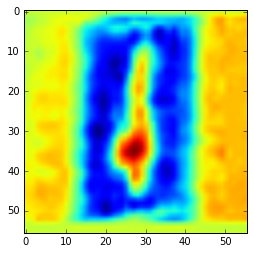

Labels [1 9 5]
Dtype float32
Shape (56, 56)
Color range -0.490575 0.5


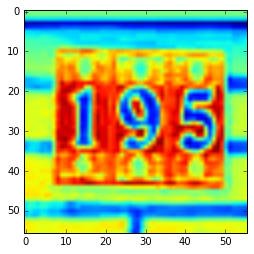

Labels [2 5]
Dtype float32
Shape (56, 56)
Color range -0.50034 0.5


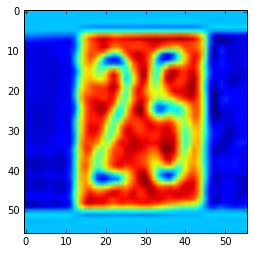

Labels [1 1]
Dtype float32
Shape (56, 56)
Color range -0.515426 0.5


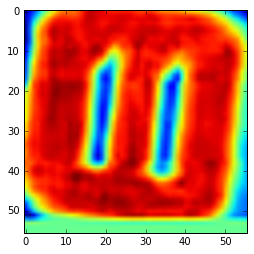

Labels [1 1]
Dtype float32
Shape (56, 56)
Color range -0.504071 0.5


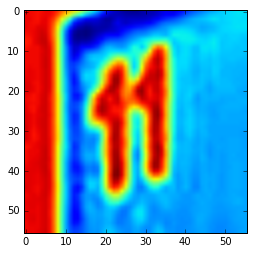

Labels [5 7]
Dtype float32
Shape (56, 56)
Color range -0.497431 0.5


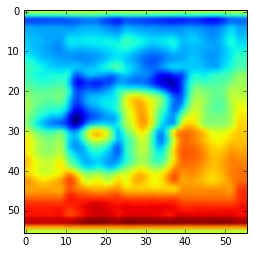

In [5]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [6]:
num_labels = 11 # Add an extra character so we can deal with spaces

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels,valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels,test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (25314, 56, 56, 1) (25314, 3, 11)
Validation set (1935, 56, 56, 1) (1935, 3, 11)
Test set (12920, 56, 56, 1) (12920, 3, 11)


In [7]:
#Limit test set as it's killing the box
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

# Create a pit sized 
train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (25314, 28, 28, 1) (25314, 3, 11)
Validation set (1935, 28, 28, 1) (1935, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [8]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [11]:
train_dataset, valid_dataset, test_dataset = dataset_56

In [12]:
def run(graph_config):
    graph = create_graph(num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, num_digits, train_dataset, train_labels, valid_labels, test_labels)
    return graph

In [13]:
# Basic
graph = run({})

Initialized
Elapsed time(s):24/120 (0.20%)
Learning rate: 0.0498705
Minibatch loss at step 500: 2.128914
Minibatch accuracy: 33.3%
Validation accuracy: 39.9%
Elapsed time(s):51/120 (0.43%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.539834
Minibatch accuracy: 62.5%
Validation accuracy: 44.7%
Elapsed time(s):79/120 (0.66%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.738261
Minibatch accuracy: 58.3%
Validation accuracy: 48.9%
Elapsed time(s):109/120 (0.91%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.194997
Minibatch accuracy: 72.9%
Validation accuracy: 52.9%
Elapsed time(s):120/120 (1.00%)

TIMEUP!
Learning rate: 0.0494511
Minibatch loss at step 2132: 1.712968
Minibatch accuracy: 62.5%
Validation accuracy: 53.5%
Test accuracy: 54.3%
Creating outputs
Finished


In [14]:
# Dropout
train_dataset, valid_dataset, test_dataset = dataset_28
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True) 
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):8/120 (0.07%)
Learning rate: 0.0498705
Minibatch loss at step 500: 2.025102
Minibatch accuracy: 35.4%
Validation accuracy: 39.3%
Elapsed time(s):17/120 (0.14%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.701936
Minibatch accuracy: 52.1%
Validation accuracy: 43.1%
Elapsed time(s):25/120 (0.21%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.731993
Minibatch accuracy: 50.0%
Validation accuracy: 47.1%
Elapsed time(s):33/120 (0.28%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.417435
Minibatch accuracy: 56.2%
Validation accuracy: 49.1%
Elapsed time(s):41/120 (0.35%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.190083
Minibatch accuracy: 72.9%
Validation accuracy: 54.0%
Elapsed time(s):49/120 (0.41%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.560276
Minibatch accuracy: 60.4%
Validation accuracy: 56.0%
Elapsed time(s):57/120 (0.48%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 0.881000
Minibatch accur

In [15]:
# Big learning rate
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     learning_rate=0.5) 
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.736129
Minibatch accuracy: 54.2%
Validation accuracy: 46.5%
Elapsed time(s):15/120 (0.13%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.154720
Minibatch accuracy: 72.9%
Validation accuracy: 54.2%
Elapsed time(s):23/120 (0.19%)
Learning rate: 0.496131
Minibatch loss at step 1500: 1.534535
Minibatch accuracy: 77.1%
Validation accuracy: 55.9%
Elapsed time(s):31/120 (0.26%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.033241
Minibatch accuracy: 87.5%
Validation accuracy: 59.9%
Elapsed time(s):39/120 (0.33%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.935838
Minibatch accuracy: 79.2%
Validation accuracy: 64.3%
Elapsed time(s):47/120 (0.39%)
Learning rate: 0.492295
Minibatch loss at step 3000: 1.106960
Minibatch accuracy: 87.5%
Validation accuracy: 65.5%
Elapsed time(s):55/120 (0.46%)
Learning rate: 0.491022
Minibatch loss at step 3500: 0.552267
Minibatch accuracy: 93

In [16]:
# Quick decay
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     learning_decay=0.2)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.0495985
Minibatch loss at step 500: 2.062600
Minibatch accuracy: 33.3%
Validation accuracy: 40.0%
Elapsed time(s):15/120 (0.13%)
Learning rate: 0.0492009
Minibatch loss at step 1000: 1.703444
Minibatch accuracy: 52.1%
Validation accuracy: 43.0%
Elapsed time(s):24/120 (0.20%)
Learning rate: 0.0488066
Minibatch loss at step 1500: 1.688864
Minibatch accuracy: 43.8%
Validation accuracy: 48.1%
Elapsed time(s):32/120 (0.27%)
Learning rate: 0.0484154
Minibatch loss at step 2000: 1.473389
Minibatch accuracy: 60.4%
Validation accuracy: 51.9%
Elapsed time(s):40/120 (0.33%)
Learning rate: 0.0480274
Minibatch loss at step 2500: 1.112803
Minibatch accuracy: 70.8%
Validation accuracy: 56.8%
Elapsed time(s):48/120 (0.40%)
Learning rate: 0.0476424
Minibatch loss at step 3000: 1.374481
Minibatch accuracy: 64.6%
Validation accuracy: 58.9%
Elapsed time(s):55/120 (0.47%)
Learning rate: 0.0472606
Minibatch loss at step 3500: 0.867053
Minibatch accu

In [17]:
# Big learning rate, quick decay
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     learning_rate=0.5,
                     learning_decay=0.2)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.495985
Minibatch loss at step 500: 1.637432
Minibatch accuracy: 58.3%
Validation accuracy: 44.2%
Elapsed time(s):17/120 (0.14%)
Learning rate: 0.492009
Minibatch loss at step 1000: 1.194621
Minibatch accuracy: 87.5%
Validation accuracy: 52.6%
Elapsed time(s):25/120 (0.21%)
Learning rate: 0.488066
Minibatch loss at step 1500: 1.405263
Minibatch accuracy: 75.0%
Validation accuracy: 56.3%
Elapsed time(s):33/120 (0.28%)
Learning rate: 0.484154
Minibatch loss at step 2000: 1.124294
Minibatch accuracy: 85.4%
Validation accuracy: 61.1%
Elapsed time(s):41/120 (0.34%)
Learning rate: 0.480274
Minibatch loss at step 2500: 1.002962
Minibatch accuracy: 85.4%
Validation accuracy: 63.7%
Elapsed time(s):49/120 (0.41%)
Learning rate: 0.476424
Minibatch loss at step 3000: 1.008287
Minibatch accuracy: 79.2%
Validation accuracy: 63.1%
Elapsed time(s):57/120 (0.48%)
Learning rate: 0.472606
Minibatch loss at step 3500: 0.796083
Minibatch accuracy: 9

In [18]:
# Bigger pictures
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     learning_rate=.4)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.398964
Minibatch loss at step 500: 1.672329
Minibatch accuracy: 62.5%
Validation accuracy: 46.1%
Elapsed time(s):15/120 (0.13%)
Learning rate: 0.397933
Minibatch loss at step 1000: 1.147053
Minibatch accuracy: 85.4%
Validation accuracy: 54.5%
Elapsed time(s):23/120 (0.20%)
Learning rate: 0.396905
Minibatch loss at step 1500: 1.464068
Minibatch accuracy: 75.0%
Validation accuracy: 58.4%
Elapsed time(s):32/120 (0.27%)
Learning rate: 0.395879
Minibatch loss at step 2000: 1.186655
Minibatch accuracy: 81.2%
Validation accuracy: 59.7%
Elapsed time(s):40/120 (0.34%)
Learning rate: 0.394856
Minibatch loss at step 2500: 0.919448
Minibatch accuracy: 77.1%
Validation accuracy: 62.6%
Elapsed time(s):48/120 (0.41%)
Learning rate: 0.393836
Minibatch loss at step 3000: 1.195525
Minibatch accuracy: 83.3%
Validation accuracy: 61.5%
Elapsed time(s):56/120 (0.47%)
Learning rate: 0.392818
Minibatch loss at step 3500: 0.629524
Minibatch accuracy: 8

In [19]:
# Max pooling
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):5/120 (0.05%)
Learning rate: 0.0498705
Minibatch loss at step 500: 2.029648
Minibatch accuracy: 37.5%
Validation accuracy: 38.9%
Elapsed time(s):12/120 (0.10%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.762381
Minibatch accuracy: 43.8%
Validation accuracy: 40.8%
Elapsed time(s):18/120 (0.16%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.715245
Minibatch accuracy: 45.8%
Validation accuracy: 46.2%
Elapsed time(s):25/120 (0.21%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.441016
Minibatch accuracy: 60.4%
Validation accuracy: 50.8%
Elapsed time(s):32/120 (0.27%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.276164
Minibatch accuracy: 62.5%
Validation accuracy: 56.7%
Elapsed time(s):38/120 (0.32%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.208533
Minibatch accuracy: 60.4%
Validation accuracy: 60.5%
Elapsed time(s):45/120 (0.38%)
Learning rate: 0.0491022
Minibatch loss at step 3500: 0.808963
Minibatch accur

In [20]:
# Max pooling
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.5)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):5/120 (0.05%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.264677
Minibatch accuracy: 83.3%
Validation accuracy: 57.0%
Elapsed time(s):11/120 (0.10%)
Learning rate: 0.497417
Minibatch loss at step 1000: 0.976928
Minibatch accuracy: 93.8%
Validation accuracy: 63.1%
Elapsed time(s):18/120 (0.16%)
Learning rate: 0.496131
Minibatch loss at step 1500: 1.023964
Minibatch accuracy: 87.5%
Validation accuracy: 67.1%
Elapsed time(s):26/120 (0.22%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.009058
Minibatch accuracy: 93.8%
Validation accuracy: 69.8%
Elapsed time(s):35/120 (0.30%)
Learning rate: 0.49357
Minibatch loss at step 2500: 0.805720
Minibatch accuracy: 89.6%
Validation accuracy: 70.1%
Elapsed time(s):42/120 (0.36%)
Learning rate: 0.492295
Minibatch loss at step 3000: 0.822892
Minibatch accuracy: 89.6%
Validation accuracy: 68.8%
Elapsed time(s):49/120 (0.41%)
Learning rate: 0.491022
Minibatch loss at step 3500: 0.480184
Minibatch accuracy: 97

In [21]:
# Max pooling
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.75)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):5/120 (0.05%)
Learning rate: 0.748058
Minibatch loss at step 500: 1.400627
Minibatch accuracy: 64.6%
Validation accuracy: 55.5%
Elapsed time(s):11/120 (0.10%)
Learning rate: 0.746125
Minibatch loss at step 1000: 1.122158
Minibatch accuracy: 91.7%
Validation accuracy: 60.4%
Elapsed time(s):18/120 (0.16%)
Learning rate: 0.744197
Minibatch loss at step 1500: 1.346166
Minibatch accuracy: 81.2%
Validation accuracy: 61.7%
Elapsed time(s):25/120 (0.21%)
Learning rate: 0.742274
Minibatch loss at step 2000: 1.260142
Minibatch accuracy: 85.4%
Validation accuracy: 64.2%
Elapsed time(s):32/120 (0.27%)
Learning rate: 0.740355
Minibatch loss at step 2500: 0.981723
Minibatch accuracy: 87.5%
Validation accuracy: 65.8%
Elapsed time(s):39/120 (0.33%)
Learning rate: 0.738442
Minibatch loss at step 3000: 1.401601
Minibatch accuracy: 77.1%
Validation accuracy: 64.9%
Elapsed time(s):47/120 (0.40%)
Learning rate: 0.736534
Minibatch loss at step 3500: 0.598110
Minibatch accuracy: 8

In [22]:
# Max pooling
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.25)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.578264
Minibatch accuracy: 62.5%
Validation accuracy: 50.1%
Elapsed time(s):15/120 (0.13%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.902803
Minibatch accuracy: 93.8%
Validation accuracy: 63.0%
Elapsed time(s):24/120 (0.21%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.016453
Minibatch accuracy: 89.6%
Validation accuracy: 66.8%
Elapsed time(s):32/120 (0.27%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.949604
Minibatch accuracy: 83.3%
Validation accuracy: 68.6%
Elapsed time(s):38/120 (0.32%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.677589
Minibatch accuracy: 91.7%
Validation accuracy: 71.9%
Elapsed time(s):45/120 (0.38%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.833999
Minibatch accuracy: 85.4%
Validation accuracy: 72.2%
Elapsed time(s):52/120 (0.44%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.391134
Minibatch accuracy: 9

In [23]:
# Max pooling
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.125)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):6/120 (0.05%)
Learning rate: 0.124676
Minibatch loss at step 500: 1.847330
Minibatch accuracy: 41.7%
Validation accuracy: 43.4%
Elapsed time(s):12/120 (0.11%)
Learning rate: 0.124354
Minibatch loss at step 1000: 1.288109
Minibatch accuracy: 68.8%
Validation accuracy: 53.4%
Elapsed time(s):19/120 (0.17%)
Learning rate: 0.124033
Minibatch loss at step 1500: 1.234973
Minibatch accuracy: 75.0%
Validation accuracy: 61.4%
Elapsed time(s):26/120 (0.22%)
Learning rate: 0.123712
Minibatch loss at step 2000: 1.066060
Minibatch accuracy: 79.2%
Validation accuracy: 65.7%
Elapsed time(s):37/120 (0.31%)
Learning rate: 0.123393
Minibatch loss at step 2500: 1.003158
Minibatch accuracy: 79.2%
Validation accuracy: 66.9%
Elapsed time(s):44/120 (0.37%)
Learning rate: 0.123074
Minibatch loss at step 3000: 0.967834
Minibatch accuracy: 85.4%
Validation accuracy: 69.5%
Elapsed time(s):51/120 (0.43%)
Learning rate: 0.122756
Minibatch loss at step 3500: 0.505072
Minibatch accuracy: 9

In [24]:
# num hidden
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.25,
                     num_hidden=128)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):8/120 (0.07%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.447778
Minibatch accuracy: 72.9%
Validation accuracy: 55.8%
Elapsed time(s):20/120 (0.17%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.853224
Minibatch accuracy: 93.8%
Validation accuracy: 66.3%
Elapsed time(s):27/120 (0.23%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.936642
Minibatch accuracy: 87.5%
Validation accuracy: 68.5%
Elapsed time(s):34/120 (0.29%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.807965
Minibatch accuracy: 87.5%
Validation accuracy: 71.0%
Elapsed time(s):42/120 (0.36%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.637023
Minibatch accuracy: 91.7%
Validation accuracy: 72.1%
Elapsed time(s):55/120 (0.46%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.832787
Minibatch accuracy: 95.8%
Validation accuracy: 72.7%
Elapsed time(s):65/120 (0.55%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.448304
Minibatch accuracy: 9

In [25]:
# num hidden
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.25,
                     num_hidden=32)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):6/120 (0.05%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.726308
Minibatch accuracy: 47.9%
Validation accuracy: 46.2%
Elapsed time(s):13/120 (0.11%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.089401
Minibatch accuracy: 81.2%
Validation accuracy: 59.7%
Elapsed time(s):22/120 (0.19%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.945390
Minibatch accuracy: 85.4%
Validation accuracy: 64.8%
Elapsed time(s):30/120 (0.25%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.010011
Minibatch accuracy: 81.2%
Validation accuracy: 66.0%
Elapsed time(s):36/120 (0.31%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.809342
Minibatch accuracy: 85.4%
Validation accuracy: 68.7%
Elapsed time(s):43/120 (0.36%)
Learning rate: 0.246147
Minibatch loss at step 3000: 1.052552
Minibatch accuracy: 77.1%
Validation accuracy: 67.6%
Elapsed time(s):49/120 (0.41%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.553042
Minibatch accuracy: 9

In [26]:
# num hidden
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.25,
                     num_hidden=256)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):7/120 (0.06%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.306920
Minibatch accuracy: 77.1%
Validation accuracy: 57.0%
Elapsed time(s):18/120 (0.15%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.772845
Minibatch accuracy: 93.8%
Validation accuracy: 67.2%
Elapsed time(s):28/120 (0.24%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.927450
Minibatch accuracy: 91.7%
Validation accuracy: 71.2%
Elapsed time(s):39/120 (0.33%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.806577
Minibatch accuracy: 100.0%
Validation accuracy: 72.4%
Elapsed time(s):51/120 (0.43%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.762329
Minibatch accuracy: 91.7%
Validation accuracy: 74.3%
Elapsed time(s):60/120 (0.51%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.932373
Minibatch accuracy: 91.7%
Validation accuracy: 73.5%
Elapsed time(s):70/120 (0.59%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.373995
Minibatch accuracy: 

In [27]:
# num hidden
graph = create_graph(valid_dataset, test_dataset,
                     use_dropout=True,
                     use_max_pool=True,
                     learning_rate=0.25,
                     num_hidden=192)
run_graph(graph, train_dataset)

Initialized
Elapsed time(s):6/120 (0.05%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.506775
Minibatch accuracy: 72.9%
Validation accuracy: 52.6%
Elapsed time(s):14/120 (0.12%)
Learning rate: 0.248708
Minibatch loss at step 1000: 0.859469
Minibatch accuracy: 89.6%
Validation accuracy: 64.8%
Elapsed time(s):24/120 (0.20%)
Learning rate: 0.248066
Minibatch loss at step 1500: 0.907816
Minibatch accuracy: 89.6%
Validation accuracy: 69.0%
Elapsed time(s):36/120 (0.30%)
Learning rate: 0.247424
Minibatch loss at step 2000: 0.949471
Minibatch accuracy: 91.7%
Validation accuracy: 70.3%
Elapsed time(s):46/120 (0.39%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.619926
Minibatch accuracy: 95.8%
Validation accuracy: 73.6%
Elapsed time(s):54/120 (0.45%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.868614
Minibatch accuracy: 87.5%
Validation accuracy: 73.3%
Elapsed time(s):62/120 (0.52%)
Learning rate: 0.245511
Minibatch loss at step 3500: 0.306327
Minibatch accuracy: 9

In [16]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

Initialized
Elapsed time(s):35/120 (0.30%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.729907
Minibatch accuracy: 62.5%
Validation accuracy: 48.2%
Elapsed time(s):75/120 (0.63%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.111864
Minibatch accuracy: 87.5%
Validation accuracy: 55.4%
Elapsed time(s):116/120 (0.97%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.516424
Minibatch accuracy: 77.1%
Validation accuracy: 58.5%
Elapsed time(s):122/120 (1.02%)

TIMEUP!
Learning rate: 0.248064
Minibatch loss at step 1501: 1.010134
Minibatch accuracy: 79.2%
Validation accuracy: 58.4%
Test accuracy: 61.4%
Creating outputs
Finished


In [18]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

Initialized
Elapsed time(s):15/120 (0.13%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.798500
Minibatch accuracy: 52.1%
Validation accuracy: 46.2%
Elapsed time(s):34/120 (0.29%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.298981
Minibatch accuracy: 79.2%
Validation accuracy: 51.5%
Elapsed time(s):53/120 (0.45%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.616918
Minibatch accuracy: 70.8%
Validation accuracy: 54.8%
Elapsed time(s):72/120 (0.60%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.074059
Minibatch accuracy: 83.3%
Validation accuracy: 58.3%
Elapsed time(s):91/120 (0.76%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.957830
Minibatch accuracy: 83.3%
Validation accuracy: 60.2%
Elapsed time(s):109/120 (0.92%)
Learning rate: 0.246147
Minibatch loss at step 3000: 1.220188
Minibatch accuracy: 79.2%
Validation accuracy: 60.4%
Elapsed time(s):120/120 (1.00%)

TIMEUP!
Learning rate: 0.24587
Minibatch loss at step 3218: 0.935502
Minibatch 

In [19]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

Initialized
Elapsed time(s):18/120 (0.16%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.964020
Minibatch accuracy: 45.8%
Validation accuracy: 40.7%
Elapsed time(s):40/120 (0.34%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.295220
Minibatch accuracy: 68.8%
Validation accuracy: 51.1%
Elapsed time(s):62/120 (0.52%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.520463
Minibatch accuracy: 70.8%
Validation accuracy: 52.6%
Elapsed time(s):84/120 (0.71%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.218938
Minibatch accuracy: 77.1%
Validation accuracy: 57.1%
Elapsed time(s):107/120 (0.89%)
Learning rate: 0.246785
Minibatch loss at step 2500: 1.102421
Minibatch accuracy: 79.2%
Validation accuracy: 57.7%
Elapsed time(s):120/120 (1.00%)

TIMEUP!
Learning rate: 0.246551
Minibatch loss at step 2683: 1.409654
Minibatch accuracy: 60.4%
Validation accuracy: 54.6%
Test accuracy: 53.5%
Creating outputs
Finished


In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})

Initialized
Elapsed time(s):28/120 (0.24%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.795786
Minibatch accuracy: 50.0%
Validation accuracy: 45.9%
Elapsed time(s):61/120 (0.51%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.271809
Minibatch accuracy: 75.0%
Validation accuracy: 53.5%
Elapsed time(s):95/120 (0.80%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.647938
Minibatch accuracy: 64.6%
Validation accuracy: 55.8%
Elapsed time(s):120/120 (1.00%)

TIMEUP!
Learning rate: 0.2476
Minibatch loss at step 1863: 1.129736
Minibatch accuracy: 83.3%
Validation accuracy: 58.1%
Test accuracy: 60.6%
Creating outputs
Finished


In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24,
             'patch_size':10})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24,
             'patch_size':4})